In [38]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
sns.set()

/home/aditya/Documents/SOMBL


In [39]:
%config InlineBackend.figure_format = 'svg'

In [102]:
length = 100
pattern = "pnjunction"

In [103]:
colorbar_kwargs = {
    "location": "right",
    "fraction": 0.046,
    "pad": 0.04,
    "format": "%.2e"
}

In [105]:
df = pd.read_csv(f"data/spin_imbalances_onehalf_error_L{length}_{pattern}.dat")
complex_types = {
    'spin_up_imb_S_plus': complex,
    'spin_up_imb_S_minus': complex,
    'spin_up_imb_S_x': complex,
    'spin_up_imb_S_y': complex,
    'spin_up_imb_S_z': complex,

    'spin_up_imb_S_plus_var': complex,
    'spin_up_imb_S_minus_var': complex,
    'spin_up_imb_S_x_var': complex,
    'spin_up_imb_S_y_var': complex,
    'spin_up_imb_S_z_var': complex
}
df = df.astype(complex_types)

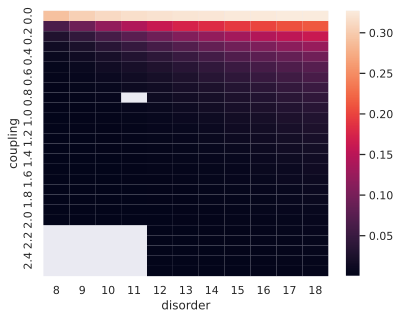

In [106]:
g = sns.heatmap(data=pd.pivot_table(data=df, index="coupling", columns="disorder", values="spin_up_imb_n_up"))

In [107]:
imbalances_real = ["spin_up_imb_n_up", "spin_up_imb_n_down",  "spin_up_imb_charge",
                   "spin_up_imb_S_x", "spin_up_imb_S_y", "spin_up_imb_S_z"]
imbalances_complex = ["spin_up_imb_S_plus",
            "spin_up_imb_S_minus", "spin_down_imb_S_plus", "spin_down_imb_S_minus",]
imbalances_considered = ["spin_up_imb_n_up"] #, "spin_down_imb_n_down"]

/tmp/ipykernel_9952/4190934940.py:8: RuntimeWarning: invalid value encountered in sqrt
  yerr = np.sqrt(np.real(df[imb+"_var"]))


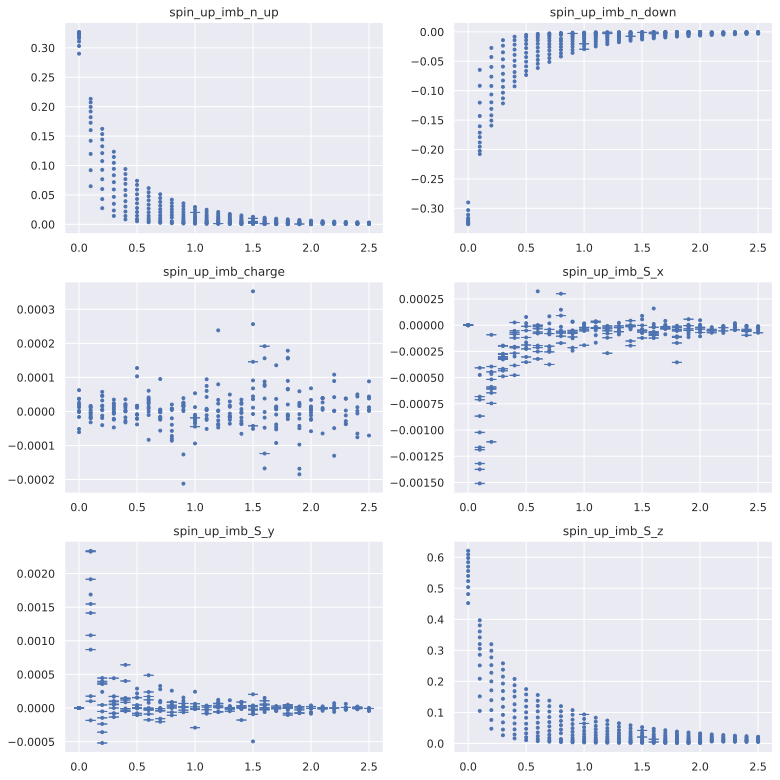

In [108]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 11))
for i, imb in enumerate(imbalances_real):
    ax = axes.flatten()[i]
    # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
    # sns.scatterplot(data=df, x="coupling", y=np.real(df[imb]), hue="disorder", ax=ax, palette="deep")
    x = df["coupling"]
    y = np.real(df[imb])
    yerr = np.sqrt(np.real(df[imb+"_var"]))
    labels = df["disorder"]
    ax.errorbar(x, y, yerr=yerr, label=labels, linestyle="", marker=".", capsize=5)
    # ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
    # ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title(imb)
fig.tight_layout()

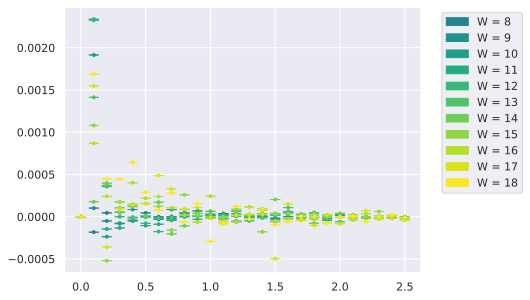

In [114]:
fig, ax = plt.subplots()
# print(df["spin_up_imb_S_x"])

data = df

# mask = df["disorder"].isin([12, 13, 14])
# mask = df.isin({"coupling": [0.5, 1.5], "disorder": [15, 18]})
# data = df[mask]
# print(mask)


# sns.scatterplot(data=data, x="coupling", y=, hue="disorder", ax=ax)
x = np.array(data["coupling"])
y = np.real(data["spin_up_imb_S_y"])
yerr = np.real(data["spin_up_imb_S_y_var"])
labels = data["disorder"]
cmap = plt.cm.viridis
colors = cmap(labels / labels.max())
uniqlabels = np.unique(labels)
labelcolors = cmap(uniqlabels / labels.max())
for i in range(len(x)):
    ax.errorbar(x[i], y[i], yerr=yerr[i], color=colors[i], linestyle="", marker=".", capsize=5)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_yscale("log")
handles = []
for i in range(len(uniqlabels)):
    handles.append(mpl.patches.Patch(color=labelcolors[i], label=f"W = {uniqlabels[i]}"))
ax.legend(handles=handles, bbox_to_anchor=(1.3,1.0), loc="upper right")

In [ ]:
KIT, 